# K-means Clustering
我们将实施和应用K-means到一个简单的二维数据集，以获得一些直观的工作原理。 K-means是一个迭代的，无监督的聚类算法，将类似的实例组合成簇。 该算法通过猜测每个簇的初始聚类中心开始，然后重复将实例分配给最近的簇，并重新计算该簇的聚类中心。 我们要实现的第一部分是找到数据中每个实例最接近的聚类中心的函数。



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
## 加载数据
data = loadmat('data/ex7data2')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data['X']

In [4]:
X.shape

(300, 2)

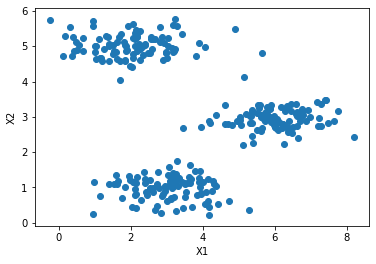

In [5]:
## 数据可视化
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 簇分配 Find closest centroids
在K-means算法的分配簇的阶段，算法将每一个训练样本分配给最接近的簇中心。
![](https://img.arctee.cn/202121260907-e.png)

In [6]:
# 为每个样本分配到最近的簇
def findClosestCentroids(X, centroids):
    m = len(X)
    idx = np.zeros(m)
    for i in range(m):
        dist = np.sum((X[i,:] - centroids) ** 2, axis=1)
        idx[i] = np.argmin(dist)
    return idx

In [7]:
# 测试下
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)
idx[:3]

array([0., 2., 1.])

## 簇移动 Computing centroid means
分配好每个点对应的簇中心，接下来要做的是，重新计算每个簇中心，为这个簇里面所有点位置的平均值。
![](https://img.arctee.cn/202121260959-7.png)

In [8]:
np.unique(idx)

array([0., 1., 2.])

In [9]:
# 计算每个簇的中心
def computeCentroids(X, idx):
    k = len(np.unique(idx)) # 簇的个数
    centroids = []
    for i in range(k):
        u_k = X[idx==i].mean(axis=0) # 求每列的均值
        centroids.append(u_k)
    return np.array(centroids)


In [10]:
computeCentroids(X, idx)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

# K-means on example dataset

## 绘制簇分布图

In [11]:
def plotCentroids(X, centriods):
    # 建立DataFrame数据结构，存储X及其对应的簇类别
    idx = findClosestCentroids(X, centriods)
    data = pd.DataFrame(X, columns=['X1', 'X2'])
    data['idx'] = idx
    
    # 绘制所有样本数据，不同簇不同颜色
    plt.scatter(data['X1'], data['X2'], c=data['idx'])
    
    # 绘制簇中心点
    plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='x')
    
    plt.show()

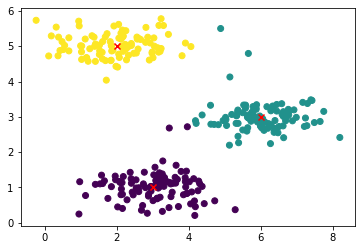

In [12]:
# 检验
centroids = np.array([[3,1], [6,3], [2,5]])
plotCentroids(X, centroids)

以上只能绘制出最后的簇中心点，无法绘制出簇中心点的变化情况  
故以下采用一种改进方式绘制

## 运行 K-means
保留每次的中心点和样本最后一次的idx，为了后续制图准备数据

In [13]:
def runKmeans(X, init_centroids, iters):
    """
    X：样本数据
    init_centriods：初始化的中心点
    iters：迭代次数
    """
    all_centroids = [] # 用来存储每次的中心点
    
    centroids_i = init_centroids
    for i in range(iters):
        idx = findClosestCentroids(X, centroids_i)
        centroids_i = computeCentroids(X, idx)
        all_centroids.append(centroids_i)
    
    return idx, all_centroids

In [16]:
initial_centroids = initial_centroids
runKmeans(X, initial_centroids, 5)[-1]

[array([[2.42830111, 3.15792418],
        [5.81350331, 2.63365645],
        [7.11938687, 3.6166844 ]]),
 array([[2.31325526, 3.22830617],
        [5.33273768, 2.43159599],
        [6.8653618 , 3.23293995]]),
 array([[2.19692479, 3.42136707],
        [4.83555397, 2.12976745],
        [6.6560054 , 3.0751355 ]]),
 array([[1.98241171, 4.0250785 ],
        [3.91150763, 1.47060546],
        [6.34008592, 3.05366642]]),
 array([[1.95399466, 5.02557006],
        [3.12663743, 1.1121712 ],
        [6.12919526, 3.01606258]])]

## 改进的簇动态分布图

In [ ]:
def plotData(X, centroids, idx):
    
    k = len(idx) # 簇数
    
    # 建立DataFrame数据结构，存储X及其对应的簇类别
    data = pd.DataFrame(X, columns=['X1', 'X2'])
    data['idx'] = idx
    
    # 绘制所有样本数据，不同簇不同颜色
    plt.scatter(data['X1'], data['X2'], c=data['idx'])
    
    # 绘制簇中心点的移动轨迹
    xx, yy = [], []
    for centroid in centroids:
        
    plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='x')
    
    plt.show()